# Competencia Santander NLP

In [93]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report, accuracy_score, balanced_accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
import warnings
warnings.filterwarnings("ignore")

## 1 - Carga del Dataset

In [2]:
df = pd.read_csv('train.csv',sep = '|')
df.columns = ['Pregunta', 'Intencion']

In [3]:
df.head()

,Pregunta,Intencion
0,como puedo trabajar en santander rio,Cat_102
1,pagar tarjeta visa querer reintegro,Cat_350
2,pagar tarjeta naranja sistema,Cat_132
3,no se debitó la primera cuota del plan de bien...,Cat_129
4,abonar tarjeta credito,Cat_342


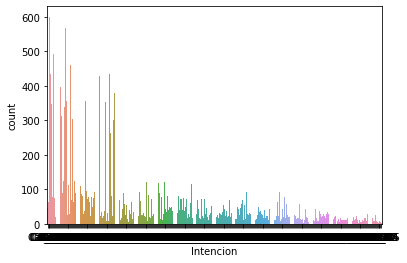

In [12]:
sns.countplot(x="Intencion", data=df[["Intencion"]])

In [40]:
dist_df = df.groupby(["Intencion"]).agg({"Pregunta": 'count'}).reset_index().sort_values(["Pregunta"], ascending=False)
dist_df.head(2)

,Intencion,Pregunta
32,Cat_132,600
208,Cat_293,567


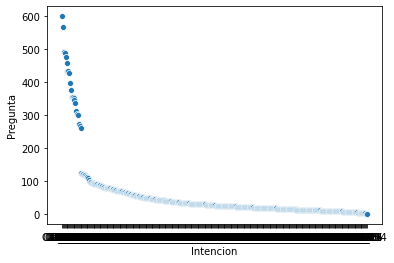

In [45]:
sns.scatterplot(data=dist_df, x="Intencion", y="Pregunta")

## 2 - Modelo Baseline

### Separacion Train y Test

In [63]:
X = df.Pregunta
y = df.Intencion

X_train, X_test, y_train, y_test = train_test_split(df.Pregunta, df.Intencion, random_state = 13571113)

In [64]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15078,), (5026,), (15078,), (5026,))

### Vectorización del texto utilizando CountVectorizer

In [72]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer(sublinear_tf=True)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

### Entrenar un modelo Support Vector Machines

In [94]:
parameters = {
    'kernel':['linear', 'rbf'],
    'C':[1, 10, 100, 1000],
    "class_weight": ["balanced", None]
}
svc = SVC()
clf = GridSearchCV(svc, parameters, n_jobs=-1, verbose=2)

In [95]:
clf.fit(X_train_tfidf, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 17.9min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kernel': ['linear', 'rbf'], 'C': [1, 10, 100, 1000], 'class_weight': ['balanced', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [97]:
clf.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [98]:
clf = SVC(kernel="linear", C=10)
clf.fit(X_train_tfidf, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### Predecir con los datos de Test

In [88]:
X_test_counts = count_vect.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

In [99]:
preds = clf.predict(X_test_tfidf)

### Metricas

In [104]:
print('El valor de Accuracy en test es de: {}'.format(round(accuracy_score(y_test, preds),3)))

El valor de Accuracy en test es de: 0.783


In [105]:
print('El valor de Accuracy en test es de: {}'.format(round(balanced_accuracy_score(y_test, preds),3)))

El valor de Accuracy en test es de: 0.669


# To Upload

## Load test

In [108]:
df_test = pd.read_csv('test_santander.csv')
df_test.head(2)

,id,Pregunta
0,0,querer saber tarjeta sin limite
1,1,¿cuál es el límite de mi tarjeta santander?


In [112]:
X_train = df.Pregunta
y_train = df.Intencion

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer(sublinear_tf=True)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = SVC(kernel="linear", C=10)
clf.fit(X_train_tfidf, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [114]:
X_test = df_test["Pregunta"]
X_test_counts = count_vect.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

In [116]:
preds = clf.predict(X_test_tfidf)

In [118]:
preds[:10]

array(['Cat_303', 'Cat_303', 'Cat_311', 'Cat_129', 'Cat_258', 'Cat_229',
       'Cat_311', 'Cat_96', 'Cat_289', 'Cat_311'], dtype=object)

In [121]:
preds = [int(pred.split("_")[1]) for pred in preds]

In [122]:
df_test["cat"] = preds

In [126]:
submit_df = df_test[["id", "cat"]]
submit_df.head(2)

,id,cat
0,0,303
1,1,303


In [127]:
submit_df.to_csv('countv_tfidf_svc_df.csv', header=False, index=False)